In [1]:
from models.PINN import *
import matplotlib.pyplot as plt
import torch.utils.data as data
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dt = 0.01
t_0 = 0.
t_f = 10.

t = torch.linspace(t_0, t_f, int(t_f/dt))
t= t.reshape((len(t), 1))
x_0 = torch.tensor([0., -1., 9.])
x_f =torch.tensor([5., 7., -3])
layers = [1, 50, 50, 3]
loss_arr = []
steps=50000
lr=0.001



epoch: 100.00000, total loss: 21.83773, data loss: 19.61510, pde loss: 0.44453, KE: -0.00012, PE: 0.03887
epoch: 200.00000, total loss: 2.48390, data loss: 2.19633, pde loss: 0.05751, KE: -0.09195, PE: 0.10114
epoch: 300.00000, total loss: 0.14357, data loss: 0.03610, pde loss: 0.02149, KE: -0.16946, PE: 0.16920
epoch: 400.00000, total loss: 0.02194, data loss: 0.00403, pde loss: 0.00358, KE: -0.18296, PE: 0.18085
epoch: 500.00000, total loss: 0.00523, data loss: 0.00073, pde loss: 0.00090, KE: -0.18530, PE: 0.18349
epoch: 600.00000, total loss: 0.00335, data loss: 0.00042, pde loss: 0.00059, KE: -0.18524, PE: 0.18367
epoch: 700.00000, total loss: 0.00283, data loss: 0.00037, pde loss: 0.00049, KE: -0.18470, PE: 0.18328
epoch: 800.00000, total loss: 0.00250, data loss: 0.00036, pde loss: 0.00043, KE: -0.18411, PE: 0.18279
epoch: 900.00000, total loss: 0.00226, data loss: 0.00035, pde loss: 0.00038, KE: -0.18355, PE: 0.18231
epoch: 1000.00000, total loss: 0.00207, data loss: 0.00035, pd

KeyboardInterrupt: 

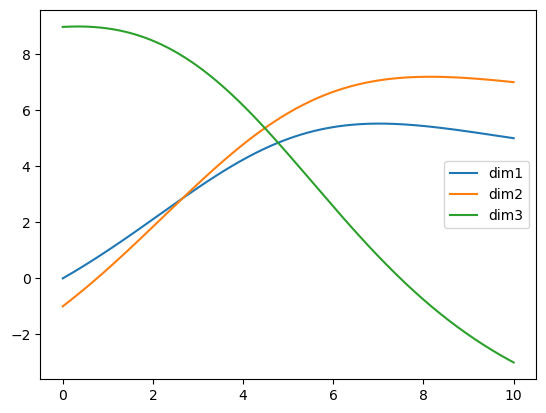

In [3]:
t_0, t_f = torch.tensor([t_0]), torch.tensor([t_f])
forward_model = PINN(layers, t_0, t_f)
params = list(forward_model.dnn.parameters())
optimizer = optim.Adam(params, lr=lr, eps=1e-08, betas = (0.8, 0.99), weight_decay=0, amsgrad=True)

for i in range(steps):
    optimizer.zero_grad()
    loss, loss_data, loss_ode, energy = forward_model.loss(t_0, t_f, x_0, x_f, t)
    loss.backward()
    optimizer.step()
    forward_model.iter+=1
    if forward_model.iter % 100 == 0:
        rollout = forward_model.dnn(t).clone().detach().numpy()
        KE = energy[0].mean()
        PE = energy[1].mean()
        plt.clf()
        plt.plot(t.clone().detach().numpy(), rollout[:, 0], label = 'dim1')
        plt.plot(t.clone().detach().numpy(), rollout[:, 1], label = 'dim2')
        plt.plot(t.clone().detach().numpy(), rollout[:, 2], label = 'dim3')
        plt.legend()
        plt.savefig('dynamics.png')
        print(
            'epoch: %.5f, total loss: %.5f, data loss: %.5f, pde loss: %.5f, KE: %.5f, PE: %.5f' %
            (
                forward_model.iter,
                loss, 
                loss_data, 
                loss_ode,
                KE, 
                PE
            )
        )



In [ ]:
du_dt = u_t
rhs = torch.zeros_like(du_dt[:, 0])
constraint = du_dt[:, 0] + du_dt[:, 1] + du_dt[:, 2]
du_dt

tensor([[[ 0.3973],
         [ 0.6757],
         [-0.9998]],

        [[ 0.3988],
         [ 0.6778],
         [-1.0037]],

        [[ 0.4003],
         [ 0.6799],
         [-1.0075]],

        ...,

        [[-0.0345],
         [ 0.0321],
         [ 0.0332]],

        [[-0.0361],
         [ 0.0298],
         [ 0.0369]],

        [[-0.0377],
         [ 0.0275],
         [ 0.0405]]], grad_fn=<StackBackward0>)

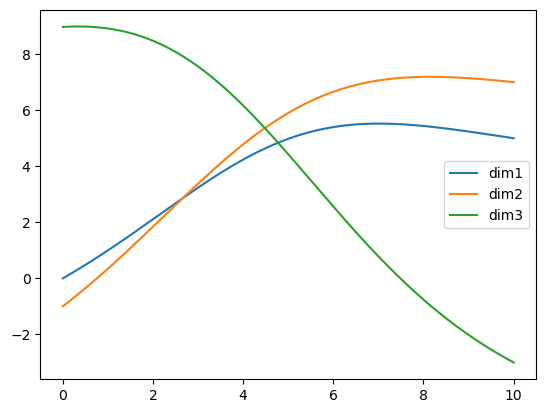

In [4]:
u = forward_model.dnn(t).clone().detach().numpy()
np.save('dumb_data2.npy', u)

u = np.load("dumb_data2.npy")
plt.clf()
plt.plot(t.clone().detach().numpy(), u[:, 0], label = 'dim1')
plt.plot(t.clone().detach().numpy(), u[:, 1], label = 'dim2')
plt.plot(t.clone().detach().numpy(), u[:, 2], label = 'dim3')
plt.legend()
plt.show()

In [ ]:
u.shape

torch.Size([1000, 3])

In [8]:

# Instantiate the model
autoencoder = Autodecoder()

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for reconstruction
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-2)
u = torch.tensor(u)
for epoch in range(1000):
    optimizer.zero_grad()
    _, u_hat = autoencoder(u)
    loss = criterion(u, u_hat)
    loss.backward()
    optimizer.step()
    print(loss.item())



/tmp/ipykernel_3382518/1378732564.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.tensor(u)


22.8563175201416
19.484066009521484
19.481731414794922
19.481966018676758
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.481971740722656
19.48197174072

KeyboardInterrupt: 

/tmp/ipykernel_246948/3814343081.py:7: RuntimeWarning: invalid value encountered in divide
  normalized_data = (data - min_vals) / (max_vals - min_vals)


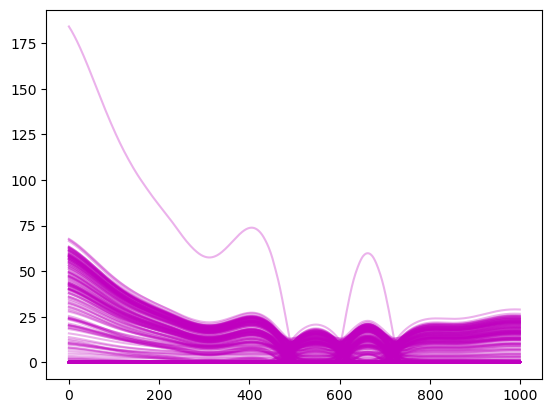

In [ ]:
HD, _ = autoencoder(u)
data = HD.clone().detach().numpy()
min_vals = np.min(data, axis=0)  # Compute min for each neuron
max_vals = np.max(data, axis=0)  # Compute max for each neuron

# Normalize each neuron's data between 0 and 1
normalized_data = (data - min_vals) / (max_vals - min_vals)
plt.clf()
plt.plot(data, color='m', alpha=0.3)
plt.show()

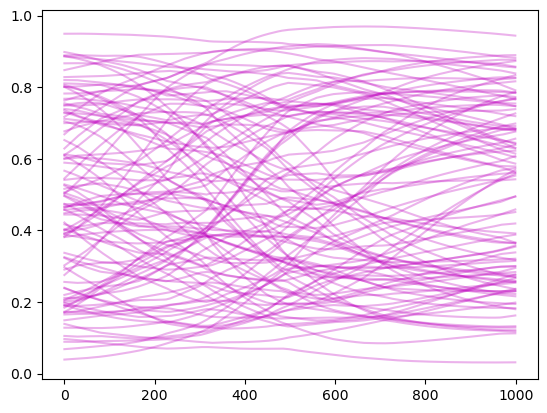

In [6]:
# Define a simple neural network
class HighDimensionalGenerator(nn.Module):
    def __init__(self):
        super(HighDimensionalGenerator, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # First hidden layer
        self.fc2 = nn.Linear(50, 100)  # Output layer to 100 dimensions
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function
        x = torch.sigmoid(self.fc2(x))
        return x

# Create the model and generate high-dimensional data
model = HighDimensionalGenerator()
u = torch.tensor(u)
generated_data = model(u)

# Convert to numpy for further use
data = generated_data.detach().numpy()
min_vals = np.min(data, axis=0)  # Compute min for each neuron
max_vals = np.max(data, axis=0)  # Compute max for each neuron

# Normalize each neuron's data between 0 and 1
normalized_data = (data - min_vals) / (max_vals - min_vals)

plt.clf()
plt.plot(data, color='m', alpha=0.3)
plt.show()

In [ ]:
KE, 

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
KE, PE = energy
KE = KE.squeeze(1)
l = forward_model.loss_function(KE+PE, torch.zeros_like(KE+PE))
s = torch.pow(KE+PE, 2).mean()
print(l, s)

tensor(0.0030, grad_fn=<MseLossBackward0>) tensor(0.0030, grad_fn=<MeanBackward0>)


In [ ]:
print(KE.shape, PE.shape)

torch.Size([1000, 1]) torch.Size([1000])


In [ ]:
PE

tensor([0.2114, 0.2225, 0.2332, 0.2436, 0.2537, 0.2635, 0.2730, 0.2822, 0.2910,
        0.2996, 0.3079, 0.3159, 0.3236, 0.3311, 0.3382, 0.3451, 0.3517, 0.3581,
        0.3642, 0.3701, 0.3757, 0.3811, 0.3863, 0.3912, 0.3959, 0.4003, 0.4046,
        0.4086, 0.4125, 0.4161, 0.4195, 0.4228, 0.4258, 0.4287, 0.4314, 0.4339,
        0.4363, 0.4384, 0.4405, 0.4423, 0.4440, 0.4456, 0.4470, 0.4482, 0.4494,
        0.4504, 0.4512, 0.4520, 0.4526, 0.4531, 0.4535, 0.4538, 0.4539, 0.4540,
        0.4540, 0.4539, 0.4537, 0.4534, 0.4530, 0.4525, 0.4520, 0.4514, 0.4507,
        0.4499, 0.4491, 0.4482, 0.4473, 0.4463, 0.4453, 0.4442, 0.4430, 0.4418,
        0.4406, 0.4394, 0.4381, 0.4367, 0.4354, 0.4340, 0.4326, 0.4311, 0.4297,
        0.4282, 0.4267, 0.4252, 0.4237, 0.4221, 0.4206, 0.4191, 0.4175, 0.4160,
        0.4144, 0.4129, 0.4113, 0.4098, 0.4082, 0.4067, 0.4052, 0.4037, 0.4022,
        0.4007, 0.3993, 0.3978, 0.3964, 0.3950, 0.3936, 0.3922, 0.3909, 0.3896,
        0.3883, 0.3870, 0.3858, 0.3845, 

In [ ]:
KE.squeeze(1)

tensor([-0.3786, -0.3845, -0.3902, -0.3957, -0.4009, -0.4060, -0.4108, -0.4154,
        -0.4199, -0.4241, -0.4282, -0.4320, -0.4357, -0.4392, -0.4425, -0.4457,
        -0.4487, -0.4515, -0.4542, -0.4567, -0.4590, -0.4612, -0.4633, -0.4652,
        -0.4670, -0.4687, -0.4702, -0.4716, -0.4729, -0.4741, -0.4751, -0.4761,
        -0.4769, -0.4777, -0.4783, -0.4789, -0.4793, -0.4797, -0.4800, -0.4802,
        -0.4803, -0.4804, -0.4803, -0.4803, -0.4801, -0.4799, -0.4796, -0.4792,
        -0.4789, -0.4784, -0.4779, -0.4774, -0.4768, -0.4761, -0.4755, -0.4748,
        -0.4740, -0.4733, -0.4725, -0.4716, -0.4708, -0.4699, -0.4690, -0.4681,
        -0.4671, -0.4662, -0.4652, -0.4642, -0.4632, -0.4622, -0.4612, -0.4602,
        -0.4592, -0.4582, -0.4572, -0.4562, -0.4552, -0.4541, -0.4531, -0.4521,
        -0.4511, -0.4502, -0.4492, -0.4482, -0.4473, -0.4463, -0.4454, -0.4445,
        -0.4436, -0.4427, -0.4419, -0.4410, -0.4402, -0.4394, -0.4386, -0.4378,
        -0.4371, -0.4364, -0.4357, -0.43